## Взять датасет в Kaggle:

- House Prices: [https://www.kaggle.com/c/house-prices-advanced-regression-techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)


## Создать `day04_full_eda.ipynb`:

- [X]  **Шаг 1: Загрузка и первичный анализ**
    - Загрузить данные
    - info(), describe(), shape
    - Проверить пропуски, дубликаты
    - Определить типы признаков (numerical, categorical)
- [X]  **Шаг 2: Univariate анализ**
    - Распределение целевой переменной
    - Histograms для всех числовых признаков
    - Countplots для категориальных признаков
    - Выявить outliers (boxplots)
- [X]  **Шаг 3: Bivariate анализ**
    - Correlation matrix (heatmap)
    - Scatter plots для важных пар признаков
    - Boxplots целевой переменной vs категориальные признаки
    - Группировки и сравнения
- [X]  **Шаг 4: Feature Engineering Ideas**
    - Записать идеи для новых признаков
    - Создать 2-3 новых признака
    - Проверить их корреляцию с целевой переменной
- [X]  **Шаг 5: Выводы**
    - Markdown ячейка с findings
    - Какие признаки важные
    - Какие есть проблемы (пропуски, outliers, imbalance)
    - План для preprocessing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# ==================== ШАГ 1: ЗАГРУЗКА И ПЕРВИЧНЫЙ АНАЛИЗ ====================

# Загрузка данных
train: pd.DataFrame = pd.read_csv("C:/Users/6muni/Documents/train.csv")
test: pd.DataFrame = pd.read_csv("C:/Users/6muni/Documents/test.csv")

print(f"Размер train датасета: {train.shape}")
print(f"Размер test датасета: {test.shape}")

# Основная информация о данных
print("\nИнформация о train датасете:")
print(train.info())

# Описательная статистика
print("\nОписательная статистика числовых признаков:")
print(train.describe())

# Проверка пропусков
missing_values: float = train.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(train)) * 100
missing_df = pd.DataFrame(
    {"Количество пропусков": missing_values, "Процент пропусков": missing_percent}
).head(
    20
)  # топ-20 признаков с пропусками

print("\nТоп-20 признаков с пропусками:")
print(missing_df[missing_df["Количество пропусков"] > 0])

# Проверка дубликатов
duplicates: float = train.duplicated().sum()
print("\nКоличество полных дубликатов строк: {duplicates}")

# Определение типов признаков
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train.select_dtypes(include=["object"]).columns.tolist()

print(f"\nКоличество числовых признаков: {len(numerical_cols)}")
print(f"Количество категориальных признаков: {len(categorical_cols)}")
print(f"Всего признаков: {len(numerical_cols) + len(categorical_cols)}")

Размер train датасета: (1460, 81)
Размер test датасета: (1459, 80)

Информация о train датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16 

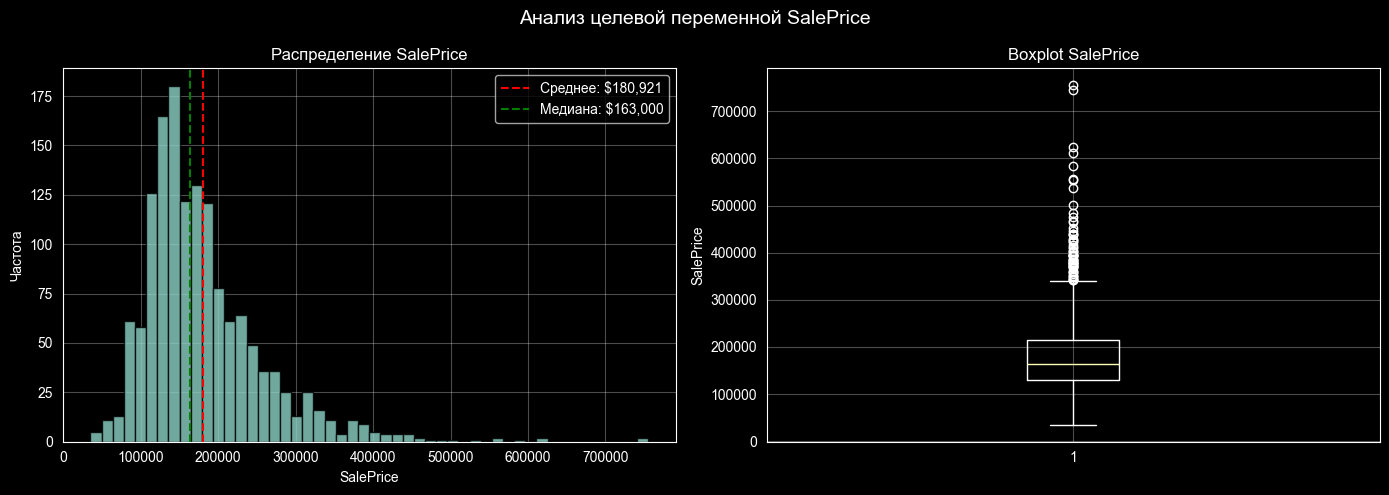


Статистики целевой переменной SalePrice:
Минимум: $34,900
Максимум: $755,000
Среднее: $180,921
Медиана: $163,000
Стандартное отклонение: $79,443


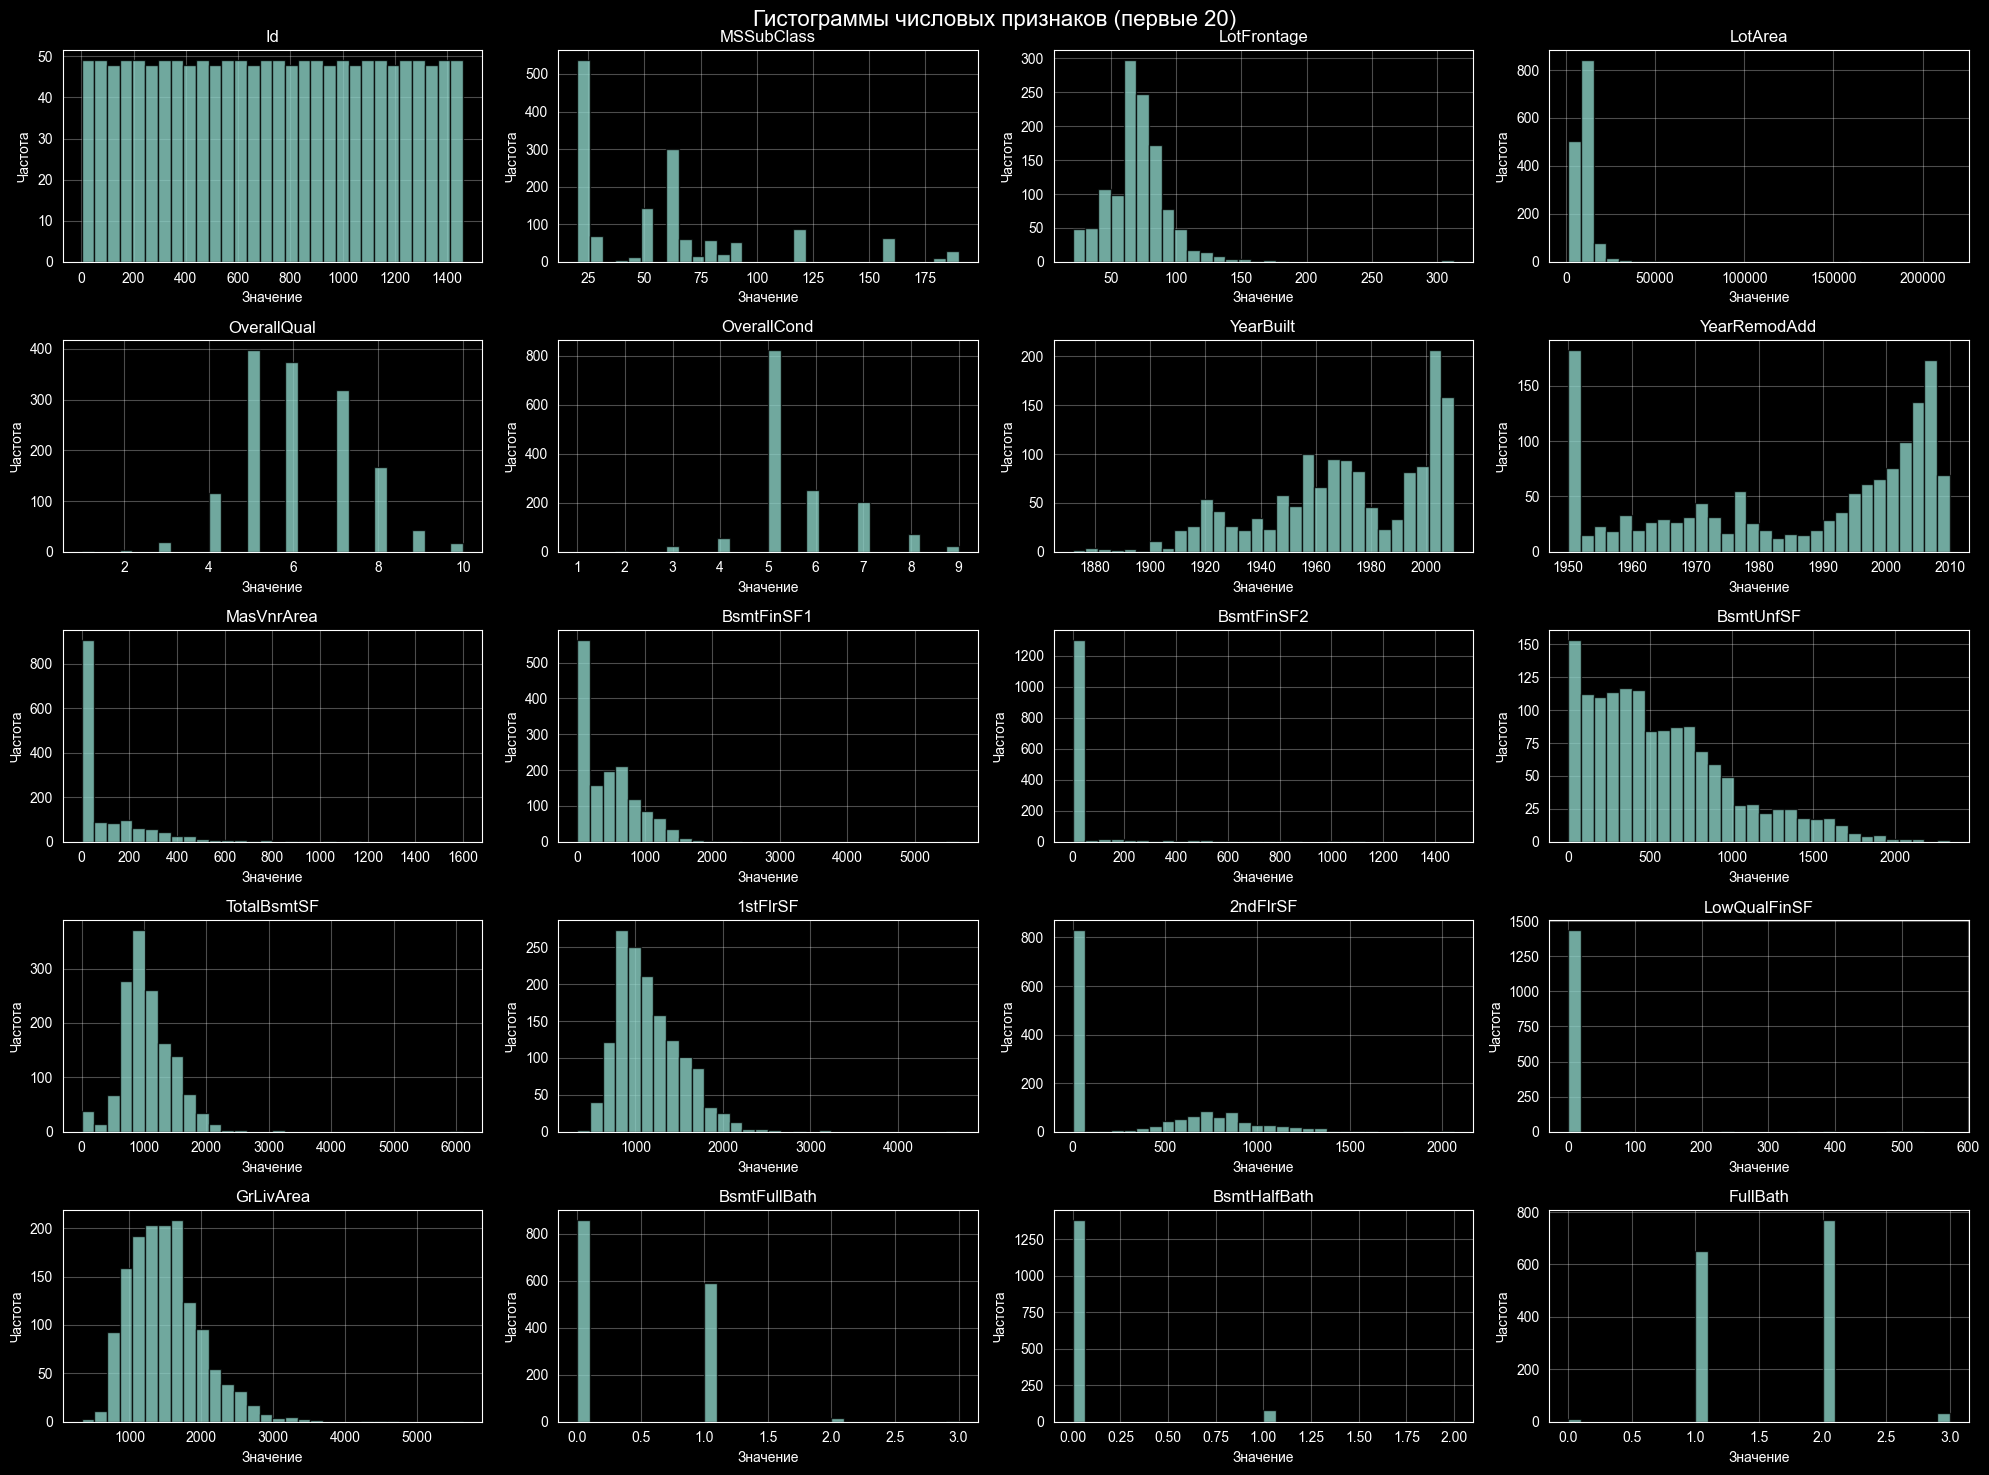

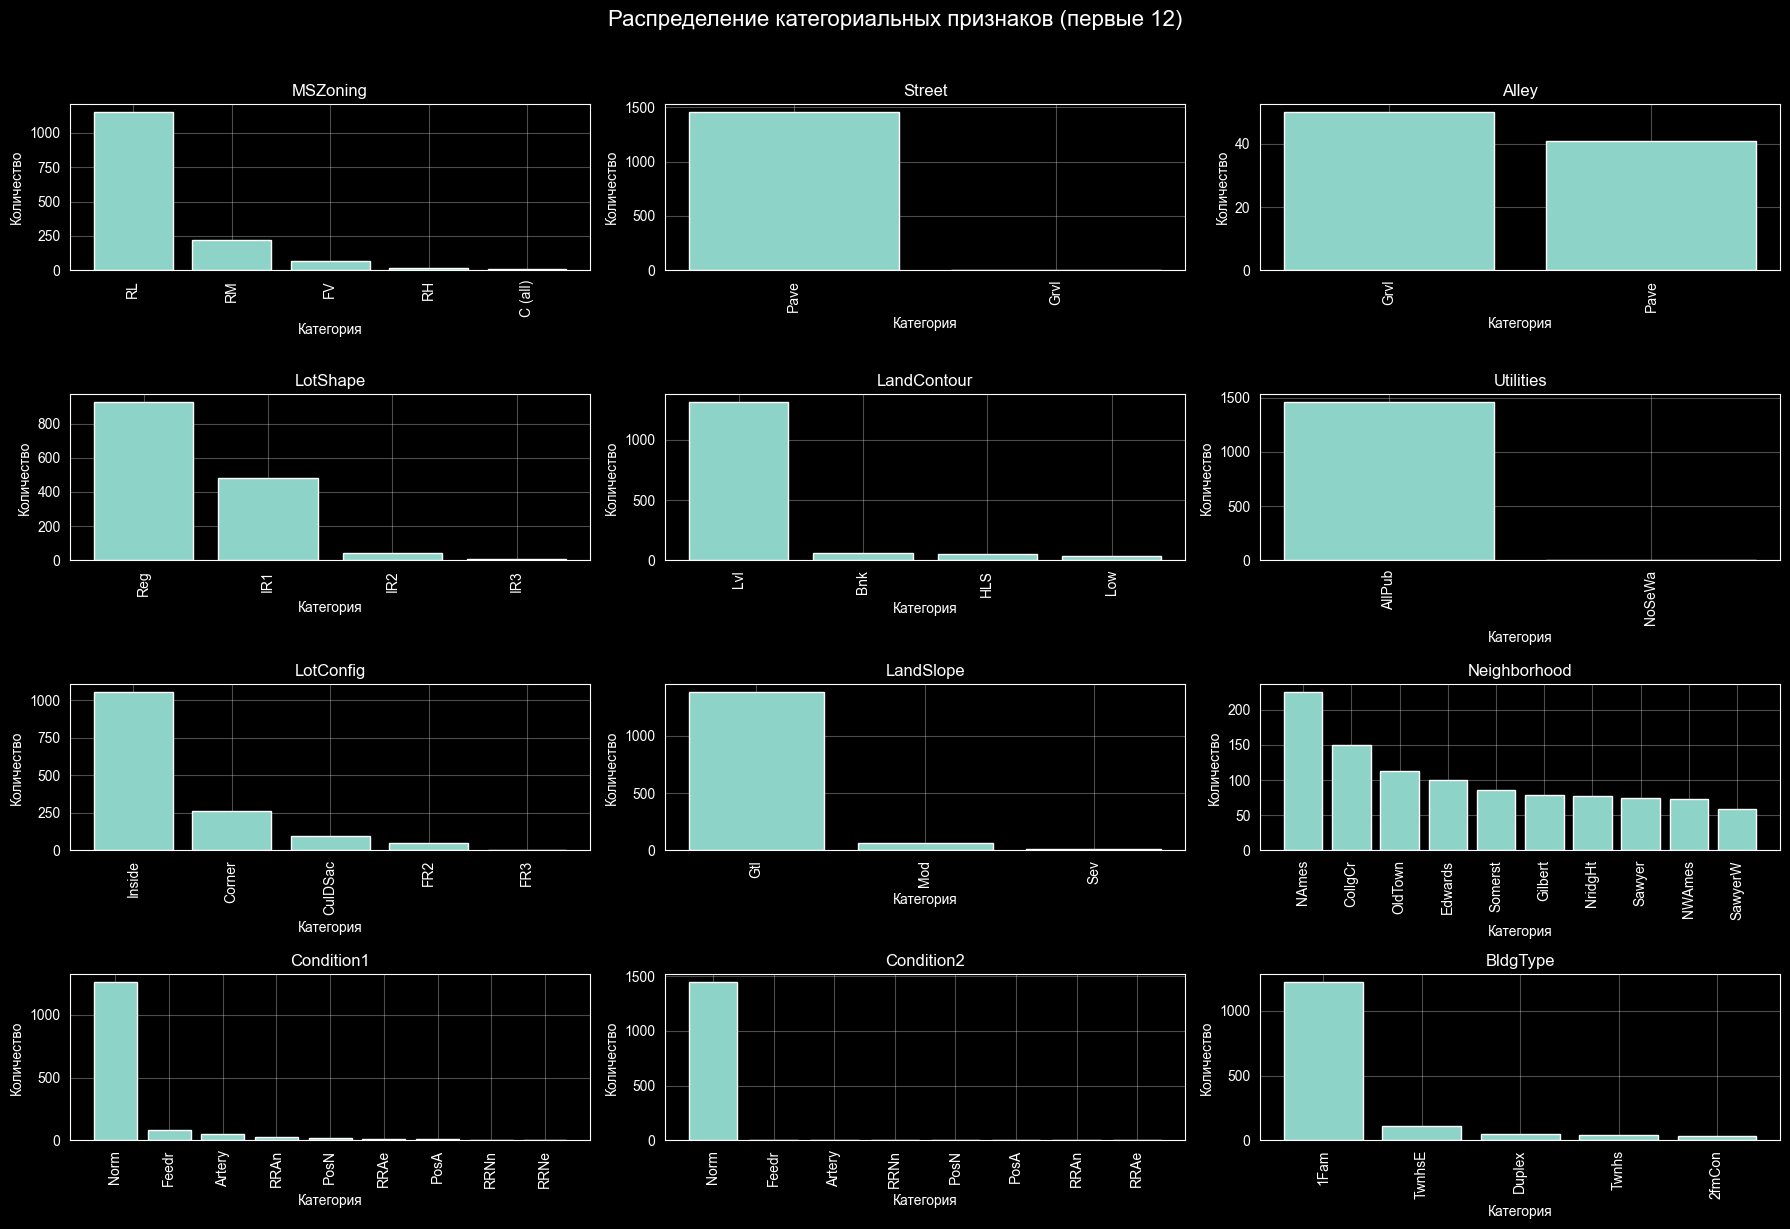

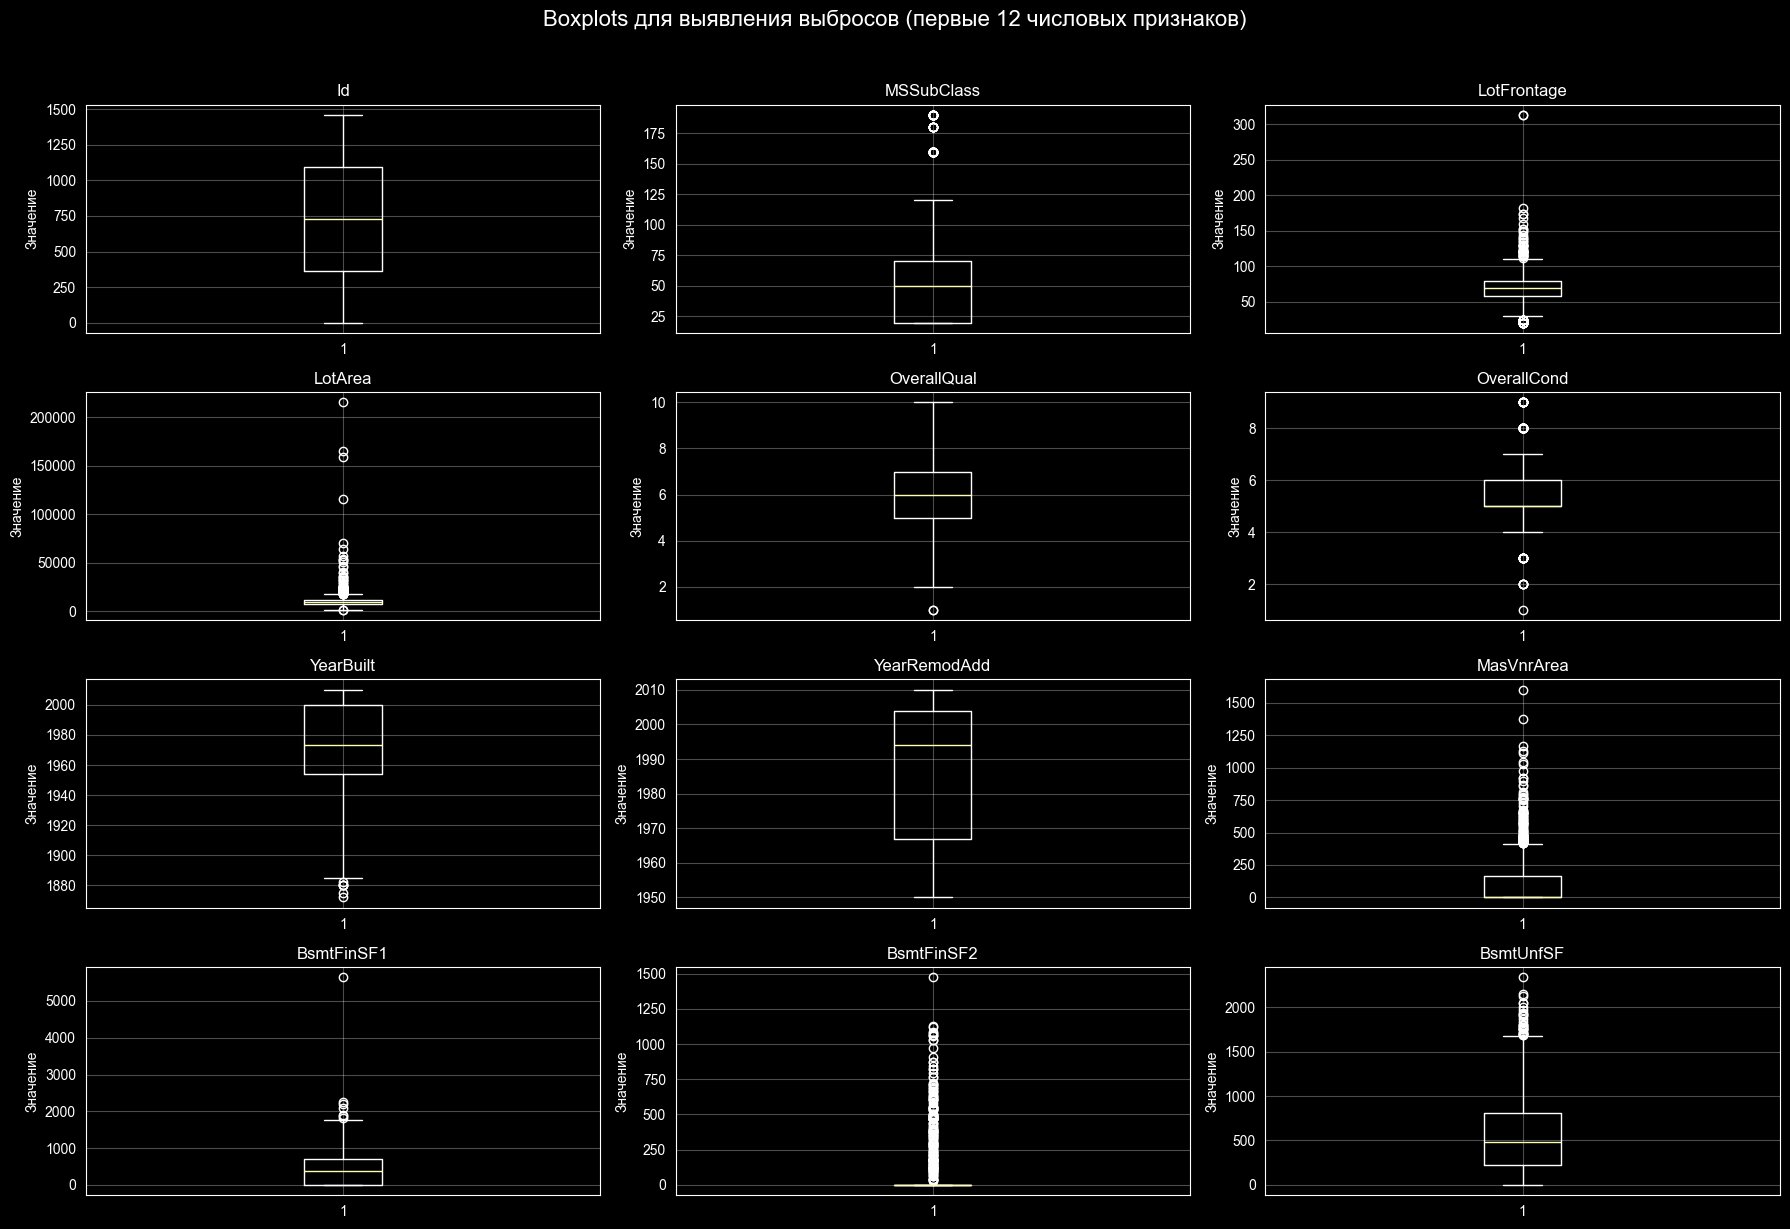

In [2]:
# ==================== ШАГ 2: UNIVARIATE АНАЛИЗ ====================

# Целевая переменная
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(train["SalePrice"], bins=50, edgecolor="black", alpha=0.8)
axes[0].set_xlabel("SalePrice")
axes[0].set_ylabel("Частота")
axes[0].set_title("Распределение SalePrice")
axes[0].axvline(
    train["SalePrice"].mean(),
    color="red",
    linestyle="--",
    label=f'Среднее: ${train["SalePrice"].mean():,.0f}',
)
axes[0].axvline(
    train["SalePrice"].median(),
    color="green",
    linestyle="--",
    label=f'Медиана: ${train["SalePrice"].median():,.0f}',
)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(train["SalePrice"])
axes[1].set_ylabel("SalePrice")
axes[1].set_title("Boxplot SalePrice")
plt.suptitle("Анализ целевой переменной SalePrice", fontsize=14)
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nСтатистики целевой переменной SalePrice:")
print(f"Минимум: ${train['SalePrice'].min():,.0f}")
print(f"Максимум: ${train['SalePrice'].max():,.0f}")
print(f"Среднее: ${train['SalePrice'].mean():,.0f}")
print(f"Медиана: ${train['SalePrice'].median():,.0f}")
print(f"Стандартное отклонение: ${train['SalePrice'].std():,.0f}")

# Гистограммы для числовых признаков (первые 20)
numerical_to_plot = numerical_cols[:20]
fig, axes = plt.subplots(5, 4, figsize=(20, 15))
axes = axes.ravel()

for idx, col in enumerate(numerical_to_plot):
    axes[idx].hist(train[col].dropna(), bins=30, edgecolor="black", alpha=0.8)
    axes[idx].set_title(f"{col}")
    axes[idx].set_xlabel("Значение")
    axes[idx].set_ylabel("Частота")
    axes[idx].grid(True, alpha=0.3)

plt.suptitle("Гистограммы числовых признаков (первые 20)", fontsize=16)
plt.tight_layout()
plt.show()

# Countplots для категориальных признаков (первые 12)
categorical_to_plot = categorical_cols[:12]
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_to_plot):
    value_counts: pd.DataFrame = train[col].value_counts().head(10)  # топ-10 категорий
    axes[idx].bar(value_counts.index.astype(str), value_counts.values)
    axes[idx].set_title(f"{col}")
    axes[idx].set_xlabel("Категория")
    axes[idx].set_ylabel("Количество")
    axes[idx].tick_params(axis="x", rotation=90)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle("Распределение категориальных признаков (первые 12)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Boxplots для выявления выбросов в числовых признаках (первые 12)
numerical_for_boxplot = numerical_cols[:12]
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_for_boxplot):
    axes[idx].boxplot(train[col].dropna())
    axes[idx].set_title(f"{col}")
    axes[idx].set_ylabel("Значение")
    axes[idx].grid(True, alpha=0.3)

plt.suptitle(
    "Boxplots для выявления выбросов (первые 12 числовых признаков)",
    fontsize=16,
    y=1.02,
)
plt.tight_layout()
plt.show()

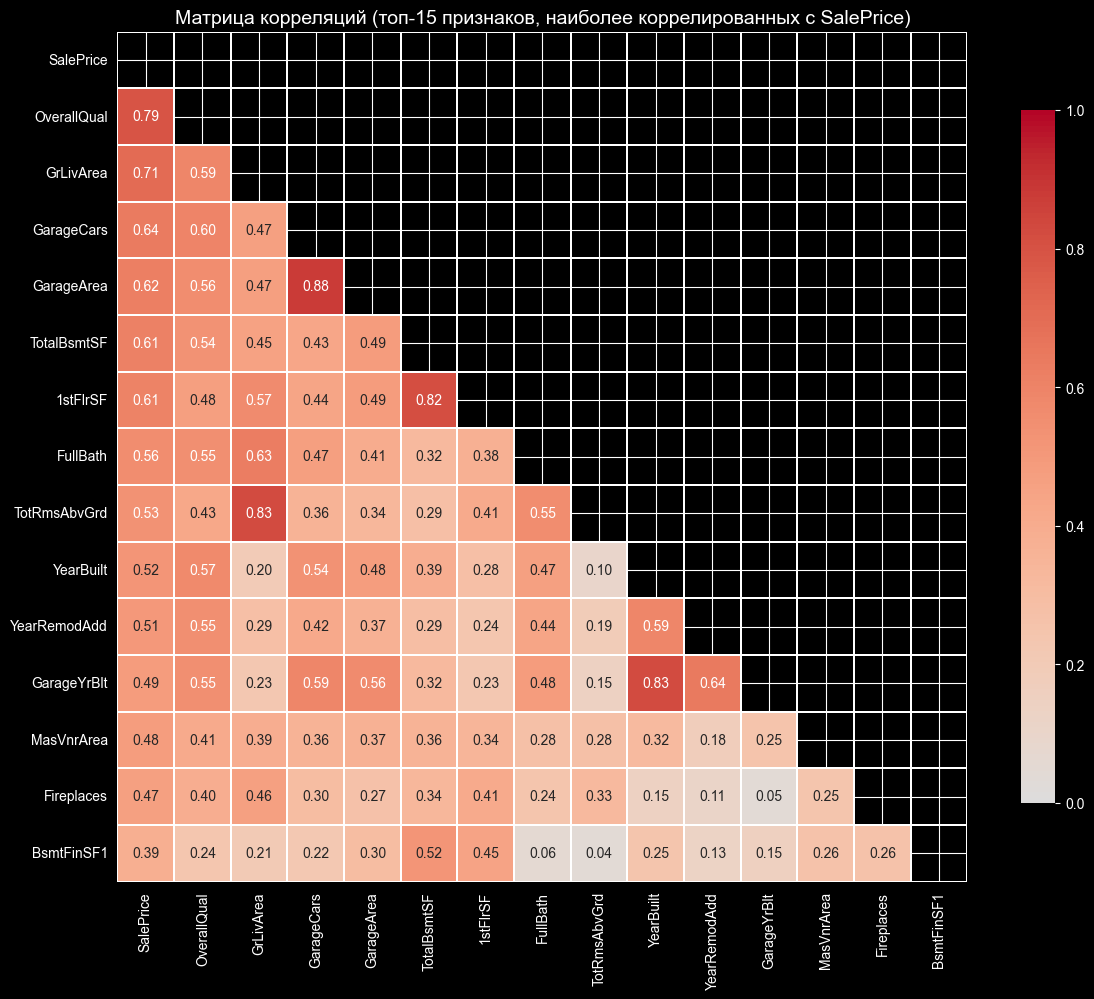


Топ-10 признаков с наибольшей корреляцией с SalePrice:
2. OverallQual: 0.79
3. GrLivArea: 0.71
4. GarageCars: 0.64
5. GarageArea: 0.62
6. TotalBsmtSF: 0.61
7. 1stFlrSF: 0.61
8. FullBath: 0.56
9. TotRmsAbvGrd: 0.53
10. YearBuilt: 0.52


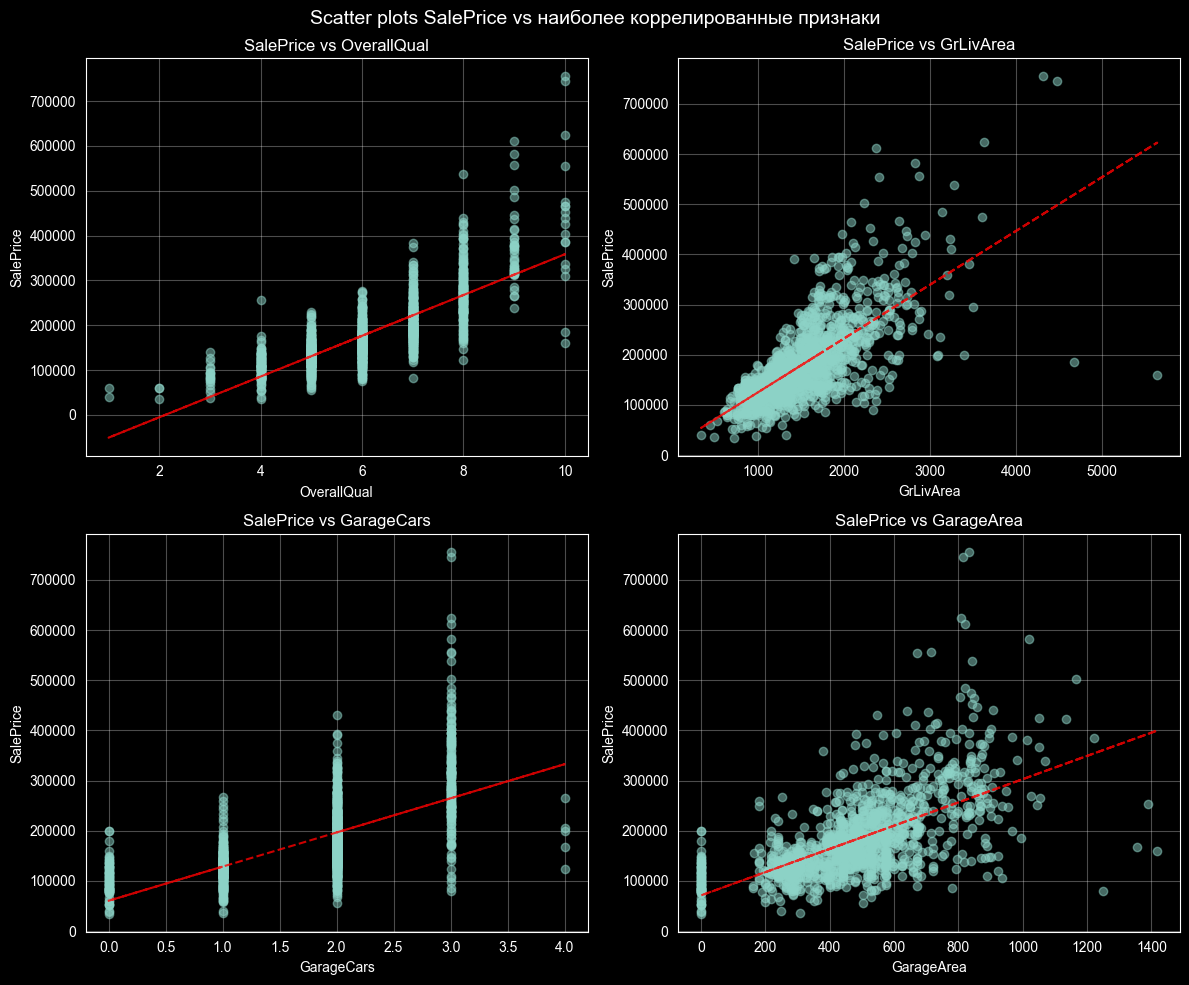

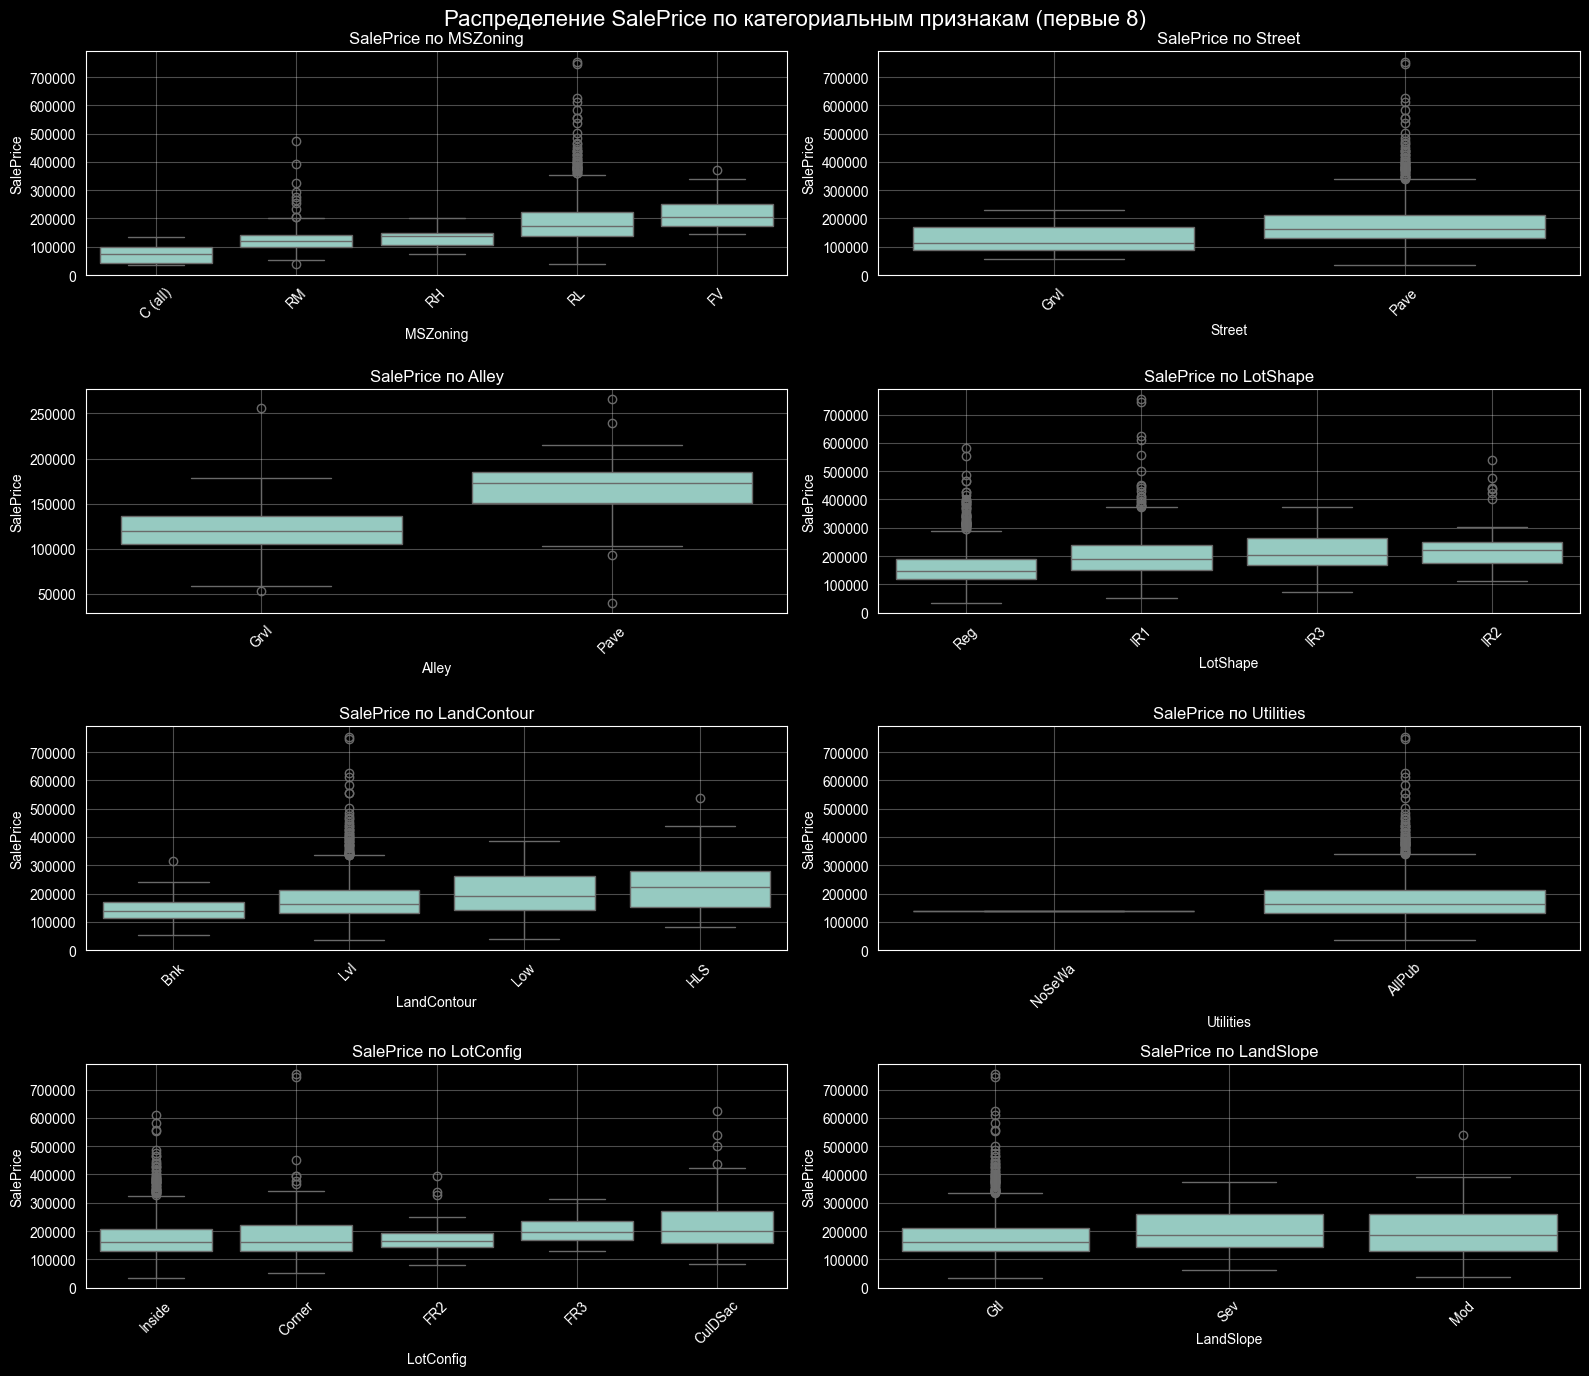


Средняя цена продажи по категориям:

Neighborhood:
                       mean    median  count
Neighborhood                                
NoRidge       335295.317073  301500.0     41
NridgHt       316270.623377  315000.0     77
StoneBr       310499.000000  278000.0     25
Timber        242247.447368  228475.0     38
Veenker       238772.727273  218000.0     11
Разброс средних цен: $335,295 - $98,576
Разница: $236,719

OverallQual:
                      mean    median  count
OverallQual                                
10           438588.388889  432390.0     18
9            367513.023256  345000.0     43
8            274735.535714  269750.0    168
7            207716.423197  200141.0    319
6            161603.034759  160000.0    374
Разброс средних цен: $438,588 - $50,150
Разница: $388,438


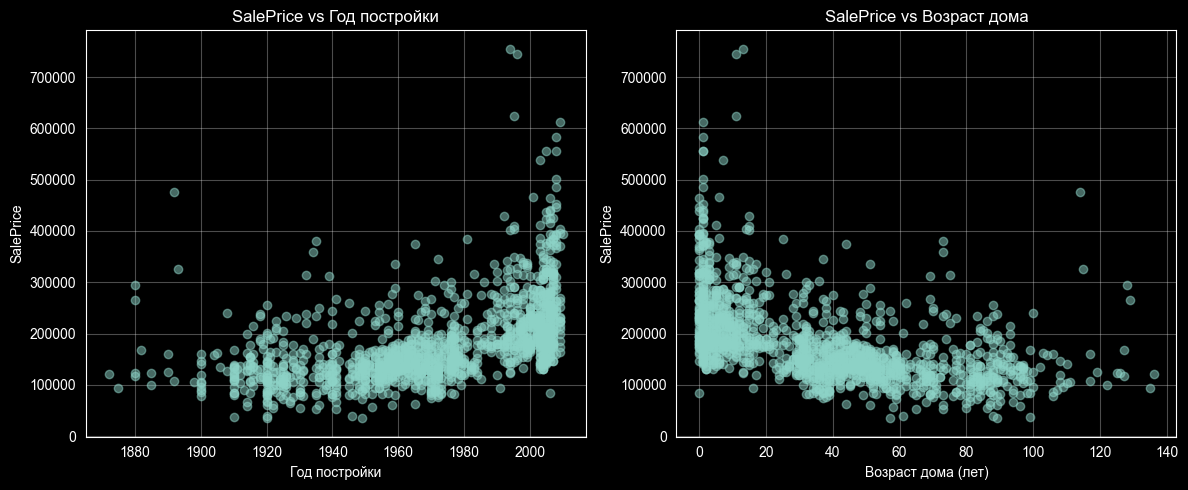


Корреляция SalePrice с возрастом дома: -0.523
Корреляция SalePrice с годом постройки: 0.523


In [3]:
# ==================== ШАГ 3: BIVARIATE АНАЛИЗ ====================

# Матрица корреляций (топ-15 наиболее коррелированных с SalePrice)
correlation_matrix = train[numerical_cols].corr()
top_corr_features = (
    correlation_matrix["SalePrice"].abs().sort_values(ascending=False).head(15).index
)
top_corr_matrix = train[top_corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    top_corr_matrix,
    mask=np.triu(np.ones_like(top_corr_matrix)),
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.1,
    fmt=".2f",
    vmin=0,
    vmax=1,
    cbar_kws={"shrink": 0.8},
)
plt.title(
    "Матрица корреляций (топ-15 признаков, наиболее коррелированных с SalePrice)",
    fontsize=14,
)
plt.tight_layout()
plt.show()

print("\nТоп-10 признаков с наибольшей корреляцией с SalePrice:")
top_corr: pd.DataFrame = correlation_matrix["SalePrice"].abs().sort_values(ascending=False).head(10)
for i, (feature, corr) in enumerate(top_corr.items(), 1):
    if feature != "SalePrice":
        print(f"{i}. {feature}: {corr:.2f}")

# Scatter plots для наиболее коррелированных признаков
top_5_corr = top_corr.index[1:6]  # исключаем SalePrice

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, col in enumerate(top_5_corr[:4]):
    axes[idx].scatter(train[col], train["SalePrice"], alpha=0.5)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("SalePrice")
    axes[idx].set_title(f"SalePrice vs {col}")
    axes[idx].grid(True, alpha=0.3)
    # Добавляем линию тренда
    z = np.polyfit(
        train[col].dropna(), train["SalePrice"].loc[train[col].dropna().index], 1
    )
    p = np.poly1d(z)
    axes[idx].plot(train[col].dropna(), p(train[col].dropna()), "r--", alpha=0.8)

plt.suptitle(
    "Scatter plots SalePrice vs наиболее коррелированные признаки", fontsize=14
)
plt.tight_layout()
plt.show()

# Boxplots целевой переменной vs категориальные признаки (первые 8)
categorical_for_boxplot = categorical_cols[:8]

fig, axes = plt.subplots(4, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(categorical_for_boxplot):
    # Берем топ-6 категорий для лучшей визуализации
    top_categories: pd.DataFrame = train[col].value_counts().head(6).index
    data_to_plot = train[train[col].isin(top_categories)]

    order = data_to_plot.groupby(col)["SalePrice"].median().sort_values().index
    sns.boxplot(x=col, y="SalePrice", data=data_to_plot, ax=axes[idx], order=order)
    axes[idx].set_title(f"SalePrice по {col}")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("SalePrice")
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis="x", rotation=45)

plt.suptitle(
    "Распределение SalePrice по категориальным признакам (первые 8)", fontsize=16
)
plt.tight_layout()
plt.show()

# Группировки и сравнения
print("\nСредняя цена продажи по категориям:")
top_categorical = ["Neighborhood", "OverallQual", "HouseStyle", "SaleCondition"]

for cat in top_categorical[:2]:  # покажем для 2 признаков
    grouped = (
        train.groupby(cat)["SalePrice"]
        .agg(["mean", "median", "count"])
        .sort_values("mean", ascending=False)
    )
    print(f"\n{cat}:")
    print(grouped.head())
    print(
        f"Разброс средних цен: ${grouped['mean'].max():,.0f} - ${grouped['mean'].min():,.0f}"
    )
    print(f"Разница: ${grouped['mean'].max() - grouped['mean'].min():,.0f}")

# Анализ зависимости цены от года постройки и года продажи
if "YearBuilt" in train.columns and "YrSold" in train.columns:
    train["HouseAge"] = train["YrSold"] - train["YearBuilt"]

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(train["YearBuilt"], train["SalePrice"], alpha=0.5)
    plt.xlabel("Год постройки")
    plt.ylabel("SalePrice")
    plt.grid(True, alpha=0.3)
    plt.title("SalePrice vs Год постройки")

    plt.subplot(1, 2, 2)
    plt.scatter(train["HouseAge"], train["SalePrice"], alpha=0.5)
    plt.xlabel("Возраст дома (лет)")
    plt.ylabel("SalePrice")
    plt.grid(True, alpha=0.3)
    plt.title("SalePrice vs Возраст дома")

    plt.tight_layout()
    plt.show()

    print(
        f"\nКорреляция SalePrice с возрастом дома: {train['SalePrice'].corr(train['HouseAge']):.3f}"
    )
    print(
        f"Корреляция SalePrice с годом постройки: {train['SalePrice'].corr(train['YearBuilt']):.3f}"
    )

### Идеи для новых признаков:

    1. Общая площадь дома (TotalSF) = 1stFlrSF + 2ndFlrSF + TotalBsmtSF

    2. Возраст дома (HouseAge) = YrSold - YearBuilt

In [4]:
# 1. Общая площадь (TotalSF)
train["TotalSF"] = train["TotalBsmtSF"] + train["1stFlrSF"] + train["2ndFlrSF"]

# 2. Возраст дома (HouseAge)
train["HouseAge"] = train["YrSold"] - train["YearBuilt"]
# Исправляем отрицательные значения (если есть)
train["HouseAge"] = train["HouseAge"].apply(lambda x: max(x, 0))


Корреляция новых признаков с SalePrice:
TotalSF: 0.78
HouseAge: -0.52


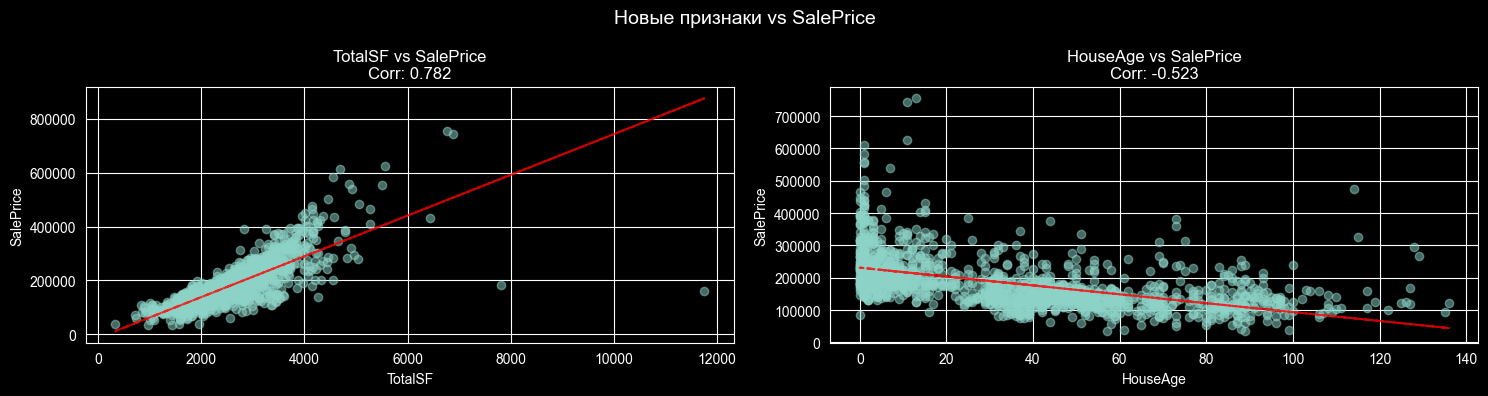

In [5]:
# Проверяем корреляцию новых признаков с SalePrice
new_features = ["TotalSF", "HouseAge"]
new_corr = train[new_features + ["SalePrice"]].corr()["SalePrice"].drop("SalePrice")

print("\nКорреляция новых признаков с SalePrice:")
for feature, corr in new_corr.items():
    print(f"{feature}: {corr:.2f}")

# Визуализируем новые признаки
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

for idx, feature in enumerate(new_features):
    axes[idx].scatter(train[feature], train["SalePrice"], alpha=0.5)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("SalePrice")
    axes[idx].set_title(f"{feature} vs SalePrice\nCorr: {new_corr[feature]:.3f}")

    # Линия тренда
    z = np.polyfit(
        train[feature].dropna(),
        train["SalePrice"].loc[train[feature].dropna().index],
        1,
    )
    p = np.poly1d(z)
    axes[idx].plot(
        train[feature].dropna(), p(train[feature].dropna()), "r--", alpha=0.8
    )

plt.suptitle("Новые признаки vs SalePrice", fontsize=14)
plt.tight_layout()
plt.show()

## Findings

### 1. Статистики целевой переменной SalePrice (в $):
- Минимум: 34,900
- Максимум: 755,000
- Среднее: 180,921
- Медиана: 163,000
- Стандартное отклонение: 79,443
- Распределение имеет правостороннюю асимметрию (положительный skew)
- Наблюдаются выбросы

### 2. Важные признаки
- `OverallQual` (0.791) - общее качество материалов и отделки
- `GrLivArea` (0.709) - жилая площадь выше уровня земли
- `GarageCars` (0.640) / `GarageArea` (0.623) - размер гаража
- `TotalBsmtSF` (0.614) - площадь подвала
- `1stFlrSF` (0.606) - площадь первого этажа

**Умеренная корреляция (0.4-0.6):**
- `FullBath` (0.561)
- `TotRmsAbvGrd` (0.534)
- `YearBuilt` (0.523)
- `YearRemodAdd` (0.507)

### 3. Созданные новые признаки
- `TotalSF` (корр. 0.782) - сильная корреляция, очень перспективный признак
- `HouseAge` (корр. -0.522) - ожидаемая отрицательная корреляция (старые дома дешевле)

## Проблемы в данных

### 1. Пропуски данных
**Критические пропуски (>15%):**
- `PoolQC` (99.5%) - качество бассейна
- `MiscFeature` (96.3%) - дополнительные удобства
- `Alley` (93.8%) - тип подъездной дороги
- `Fence` (80.8%) - качество забора
- `FireplaceQu` (47.3%) - качество камина

**Умеренные пропуски (5-15%):**
- `LotFrontage` (17.7%) - фронтальная часть участка
- `GarageYrBlt` (5.5%) и другие связанные с гаражом

### 2. Выбросы (Outliers)
- Целевая переменная SalePrice имеет экстремально высокие значения
- Некоторые числовые признаки (`GrLivArea`, `LotFrontage`, `TotalBsmtSF`) имеют выбросы
- Категориальные признаки с редкими категориями

### 3. Дисбаланс в категориальных признаках
- Некоторые категории имеют очень мало примеров
- Например, в `Street` 99.6% значений - Pave
- В `Utilities` 99.9% значений - AllPub

### 4. Мультиколлинеарность
- Сильная корреляция между некоторыми признаками:
  - `GarageCars` и `GarageArea` (0.882)
  - `TotalBsmtSF` и `1stFlrSF` (0.819)
  - `GrLivArea` и `TotRmsAbvGrd` (0.825)

## План для Preprocessing

### 1. Обработка пропусков
**Для числовых признаков:**
- Критические пропуски (`PoolQC`, `MiscFeature` и др.) - заполнить значением "None" или удалить
- `LotFrontage` - заполнить медианой по Neighborhood
- Гаражные признаки - заполнить 0 для домов без гаража

**Для категориальных признаков:**
- Заполнить пропуски модой или новыми категориями (например, "Unknown")

### 2. Обработка выбросов
- Анализ и удаление экстремальных значений в целевой переменной
- Логарифмическое преобразование SalePrice для нормализации распределения

### 3. Feature Engineering (дополнительные идеи)
- Создание бинарных признаков для редких категорий
- Группировка редких категорий в "Other"
- Взаимодействия признаков (например, OverallQual * GrLivArea)
- Извлечение информации из дат (месяц, сезон, квартал продажи)

### 4. Кодирование категориальных переменных
- One-Hot Encoding для признаков с малым числом категорий
- Target Encoding / Mean Encoding для признаков с большим числом категорий
- Ordinal Encoding для порядковых признаков (качественных оценок)

### 5. Выбор признаков
- Удаление признаков с высокой корреляцией (мультиколлинеарность)
- Отбор признаков по важности (feature importance)
- PCA для уменьшения размерности при необходимости

### 6. Работа с целевой переменной
- Логарифмическое преобразование для уменьшения skewness
- Проверка на нормальность остатков после обучения модели

## Рекомендации для моделирования

1. **Начать с простых моделей**: Linear Regression, Ridge, Lasso для baseline
2. **Использовать перекрестную проверку**: 5-10 folds для надежной оценки
3. **Ансамблирование**: Random Forest, Gradient Boosting (XGBoost, LightGBM, CatBoost)
4. **Stacking/Blending**: Комбинирование нескольких моделей
5. **Гиперпараметр тюнинг**: GridSearchCV или RandomizedSearchCV